In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
df = pd.read_csv('BASEBALL_1M.csv')
df

,Unnamed: 0,Victor_Conte,Jeremy_Giambi,Jason_Giambi,Gary_Sheffield,Bobby_Estalella,Benito_Santiago,Marvin_Bernard,Barry_Bonds,Armando_Rios,...,Kevin_Young,Tim_Laker,Hal_Morris,Mike_Lansing,Glenallen_Hill,Mike_Bell,Bart_Miadich,Jim_Parque,Phil_Hiatt,Denny_Neagle
0,Victor_Conte,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jeremy_Giambi,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Jason_Giambi,1,1,2,2,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
3,Gary_Sheffield,1,1,2,2,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Bobby_Estalella,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Mike_Bell,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
68,Bart_Miadich,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
69,Jim_Parque,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
70,Phil_Hiatt,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Cool. Got our data from .csv in a dataframe, now we need to get rid of the index numbers so it goes nicely into networkx with the "nx.from_pandas_adjacency" method.

In [44]:
df.set_index('Unnamed: 0', inplace=True)
df

,Victor_Conte,Jeremy_Giambi,Jason_Giambi,Gary_Sheffield,Bobby_Estalella,Benito_Santiago,Marvin_Bernard,Barry_Bonds,Armando_Rios,Randy_Velarde,...,Kevin_Young,Tim_Laker,Hal_Morris,Mike_Lansing,Glenallen_Hill,Mike_Bell,Bart_Miadich,Jim_Parque,Phil_Hiatt,Denny_Neagle
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Victor_Conte,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Jeremy_Giambi,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Jason_Giambi,1,1,2,2,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
Gary_Sheffield,1,1,2,2,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
Bobby_Estalella,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mike_Bell,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Bart_Miadich,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Jim_Parque,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Honestly took me forever to figure out that it was this easy. I tried/considered trying so many diffent ways to get this into networkx: itterating through the .csv line by line, itterating through a dataframe, converting to numpy arrary... it just wasn't cooperating and didn't seem like you should have to do all that... but, I eventually found this.

In [70]:
G = nx.from_pandas_adjacency(df)

In [129]:
print(nx.info(G))

Graph with 72 nodes and 1017 edges


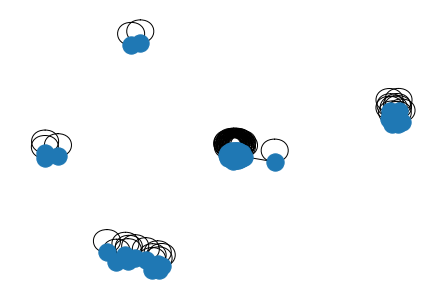

In [71]:
nx.draw(G)

Well, that looks terrible. let's start by cleaning up the loops linking players to themselves.

In [72]:
G.remove_edges_from(nx.selfloop_edges(G))

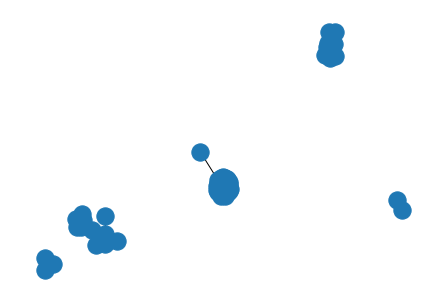

In [130]:
nx.draw(G)

That's a start. Ok, now to make this a bit more readable.

Edit: came back up here to take a look at centrality. Will use this later to find the most central person/people and also to resize the nodes so that the more connected players have bigger nodes.

In [149]:
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)
print(deg_cent)
print(bet_cent)

{'Victor_Conte': 0.07042253521126761, 'Jeremy_Giambi': 0.07042253521126761, 'Jason_Giambi': 0.1267605633802817, 'Gary_Sheffield': 0.1267605633802817, 'Bobby_Estalella': 0.09859154929577466, 'Benito_Santiago': 0.09859154929577466, 'Marvin_Bernard': 0.09859154929577466, 'Barry_Bonds': 0.1267605633802817, 'Armando_Rios': 0.1267605633802817, 'Randy_Velarde': 0.09859154929577466, 'Matt_Williams': 0.07042253521126761, 'Daren_Holmes': 0.07042253521126761, 'Paul_Byrd': 0.07042253521126761, 'Jose_Guillen': 0.07042253521126761, 'Ismael_Vaklez': 0.07042253521126761, 'Jason_Grimsley': 0.1267605633802817, 'Troy_Glaus': 0.014084507042253521, 'Scott_Schoeneweis': 0.014084507042253521, 'Steve_Woodward': 0.056338028169014086, 'Gary_MatthewsJr': 0.07042253521126761, 'David_Bell': 0.07042253521126761, 'Jose_Canseco': 0.08450704225352113, 'John_Rocker': 0.04225352112676056, 'Jay_Gibbons': 0.014084507042253521, 'Rick_Ankiel': 0.014084507042253521, 'Chuck_Knoblauch': 0.028169014084507043, 'Roger_Clemense': 

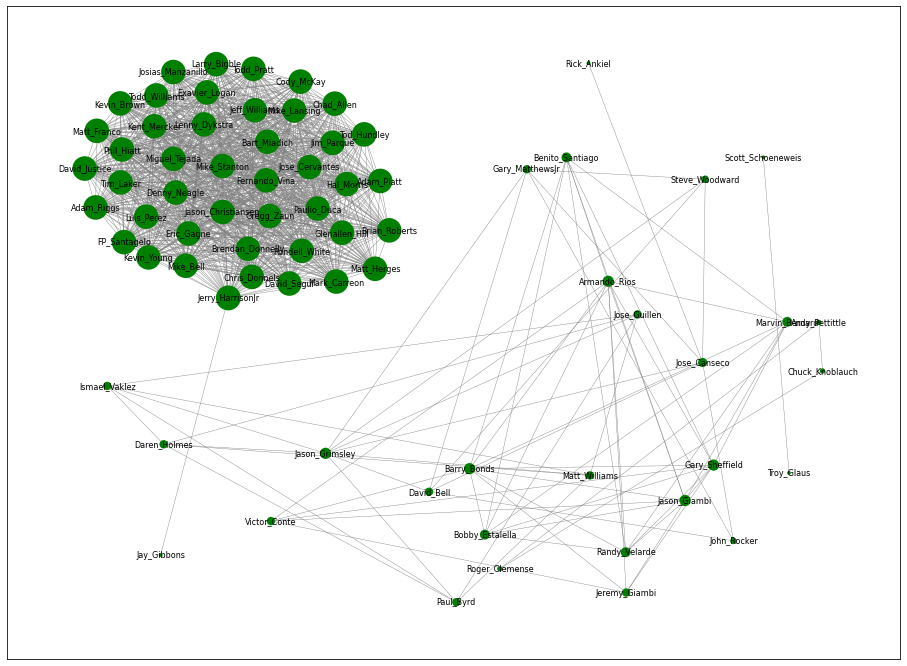

In [151]:
fig, ax = plt.subplots(figsize=(16, 12))

options = {
    'node_color': 'green',
    'node_size': [dc*1000 for dc in deg_cent.values()],
    'linewidths': 0,
    'edge_color': 'grey',
    'width': 0.4,
    'with_labels': True,
    'font_size': 8,
}
pos = nx.spring_layout(G, k=1.3)
nx.draw_networkx(G, pos, **options)

Ok, the graph gives us some info, but I'd like to see if we can narrow this down to the most connected person.

In [152]:
# Compute the maximum betweenness centrality
max_bc = max(bet_cent.values())
# Find the player(s) that have highest centrality
prolific_collaborators = [n for n, bc in bet_cent.items() if bc == max_bc]

In [153]:
print(prolific_collaborators)

['Jerry_HarrisonJr']


And there he is! The most connected person in the group is Jerry_HarrisonJr.


But.... removing him doesn't look like it would do much. Everyone else in that cluster is connected to eachother. And I just now realized that that's because this data actually just shows which players were on the same team at the same time. There was a 2nd .csv file I didn't use because I couldn't get it to work. Now that I 'kinda' know what I'm doing, I think I can make a better product by combining our data.

I used excel to copy/paste all the data together and now we're gonna work with ALL of it. So, here's some copy/paste from above, but targeting the new .csv file.

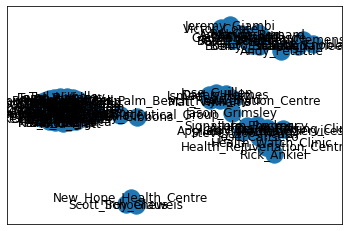

In [159]:
df = pd.read_csv('BASEBALL_3M.csv')
df.set_index('Unnamed: 0', inplace=True)
G = nx.from_pandas_adjacency(df)
G.remove_edges_from(nx.selfloop_edges(G))
nx.draw_networkx(G)

Need to clean that up a bit. Also would like to make players and providers different colors, so making a list of providers to use later.

In [171]:
df_prov = pd.read_csv('BASEBALL_2M.csv')
providers = list(df_prov.columns)
print(providers)

['Unnamed: 0', 'BALCO', 'Greg_Anderson', 'Palm_Beach_Rejuvenation_Centre', 'New_Hope_Health_Centre', 'Signature_Pharmacy', 'American_Pharmaceutical_Group', 'Health_Rejuvenation_Centre', 'Applied_Pharmacy_Services', 'Arizona_AntiAging_Clinic', 'Health_Watch_Clinic', 'BrianMcNamee', 'Kirk_Radomski']


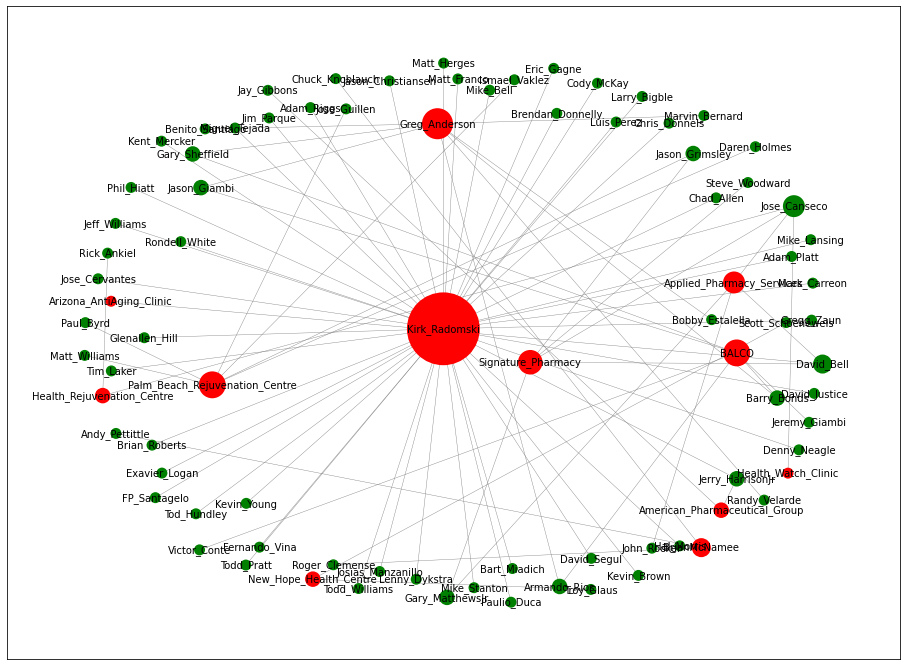

In [195]:
deg_cent = nx.degree_centrality(G)

fig, ax = plt.subplots(figsize=(16, 12))


colorlist = []
for p in df.columns:
    if p in providers:
        color = 'red'
    else:
        color = 'green'
    colorlist += [color]

options = {
    'node_color': colorlist,
    'node_size': [dc*10000 for dc in deg_cent.values()],
    'linewidths': 0,
    'edge_color': 'grey',
    'width': 0.4,
    'with_labels': True,
    'font_size': 10,
}
pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, pos, **options)

Ok! much better. Looks like we have someone to target now. It looks like Kirk Radomski is significantly more connected than anyone else in the group.


Let's do some calculations to backup that claim and see if it lines up to what we see in the network graph.

In [196]:
max_dc = max(deg_cent.values())
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]
print(prolific_collaborators)

['Kirk_Radomski']


Tried to wing it, but gave up after a while and stole some code from the internet for this part.

In [217]:
def keyfunction(k):
    return deg_cent[k]

for key in sorted(deg_cent, key=keyfunction, reverse=True)[:5]:
    print("%s: %f" % (key, deg_cent[key]))

Kirk_Radomski: 0.530120
Greg_Anderson: 0.096386
BALCO: 0.072289
Palm_Beach_Rejuvenation_Centre: 0.072289
Signature_Pharmacy: 0.060241


And that does it. I think we can definitively say that the guy to remove to make the most effect on the system (with the least amount of effort) is:  **Kirk Radomski**